# DSC630_WK04.02_Kim-Schreck

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# 04.02.01-01
# read csv
# assign variable
# dt01

dt01 = pd.read_csv('als_data.csv')

In [3]:
# 04.02.01-02
# set max columns
# dt01

pd.set_option('display.max_columns', None)

In [26]:
# 04.02.01-03
# return max columns and top 10 rows
# dt01

dt01.head(4)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.22055,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.437,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.17065,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.771,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.29540,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.661,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.34530,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.106,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0


In [27]:
# 04.02.01-04
# return bottom ten rows
# dt01

dt01.tail(4)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,23.0,18.0,15.0,0.014519,27,22.0,18.0,0.016334,31.0,27.8,24.0,0.012704,6.0700,5.0000,3.57000,0.004537,95,90.0,80,0.027223,155,140.0,130,0.045372,2.50000,2.30000,2.13000,0.000672,111.0,106.0,101.0,0.018149,72.000,55.0,41.00,0.056261,1,11.300,6.500,4.800,0.011797,6,4.0,1,0.009074,42.0,40.00,38.0,0.007260,137.0,132.0,127.0,0.018149,8,8.0,6,0.003630,8,6.0,4,0.007260,-527,1,260,217.0,196.0,4.8,4.25,3.9,0.001633,86,78.0,72,0.025408,4,4.0,3,0.001815,146.0,143.0,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,129.0,76.5,62.0,0.047619,62,46.0,41.0,0.035016,31.0,28.0,21.0,0.014925,7.8500,6.4300,4.53000,0.005817,102,86.0,76,0.045694,140,120.0,102,0.066784,2.58000,2.34000,2.30000,0.000474,111.0,105.0,99.0,0.015873,82.000,54.0,45.00,0.048654,2,7.400,5.700,4.800,0.004695,5,2.0,2,0.005474,46.0,45.00,43.0,0.009701,157.0,151.0,147.0,0.031056,3,2.0,2,0.001825,10,10.0,9,0.001825,-1589,2,246,222.0,187.0,4.4,3.95,3.7,0.001425,102,86.0,62,0.070299,4,4.0,3,0.001825,144.0,141.0,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,95.0,51.0,42.0,0.094643,63,44.0,36.0,0.048214,32.0,29.0,21.0,0.019643,6.2067,4.0161,3.28590,0.005216,90,77.0,70,0.035714,150,122.0,100,0.089286,2.47005,2.32035,2.22055,0.000446,105.0,102.0,98.0,0.012500,61.880,44.2,26.52,0.063143,2,6.882,4.884,4.107,0.004955,8,6.5,4,0.007143,51.5,48.05,45.2,0.012186,171.0,162.5,155.0,0.030948,3,3.0,2,0.001786,12,12.0,10,0.003571,-558,2,271,237.0,187.0,4.8,4.20,3.9,0.001607,104,90.0,85,0.033929,4,4.0,2,0.003571,140.0,139.0,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0
2222,2424,48,48.0,45.0,40.0,0.018476,-2.050562,37,34.0,11,0.059908,37.0,32.0,13.0,0.055427,38,28.0,11.0,0.062356,31.0,27.0,22.0,0.020785,7.5000,5.3600,1.27785,0.014370,90,80.0,70,0.046083,150,130.0,110,0.092166,2.65000,2.43000,2.33000,0.000739,108.0,107.0,99.0,0.020785,93.704,76.0,68.00,0.059363,2,6.300,5.550,4.900,0.003333,8,7.0,0,0.018433,54.0,51.00,46.6,0.017090,178.0,167.0,161.0,0.039261,8,8.0,6,0.004608,10,8.0,3,0.016129,-204,1,357,299.0,248.0,5.3,4.60,4.2,0.002949,98,84.0,64,0.078341,4,4.0,1,0.006912,145.0,141.0,137.0,0.018476,999482,8,8.0,1,0.016129,5.00,5.0,5.0


In [6]:
# 04.02.01-05
# return dimensions
# dt01

print(dt01.shape)

(2223, 101)


In [7]:
# 04.02.01-06
# return all column names
# assign variable
# dt01_clnm

for clnm in dt01.columns:
    print(clnm)

ID
Age_mean
Albumin_max
Albumin_median
Albumin_min
Albumin_range
ALSFRS_slope
ALSFRS_Total_max
ALSFRS_Total_median
ALSFRS_Total_min
ALSFRS_Total_range
ALT.SGPT._max
ALT.SGPT._median
ALT.SGPT._min
ALT.SGPT._range
AST.SGOT._max
AST.SGOT._median
AST.SGOT._min
AST.SGOT._range
Bicarbonate_max
Bicarbonate_median
Bicarbonate_min
Bicarbonate_range
Blood.Urea.Nitrogen..BUN._max
Blood.Urea.Nitrogen..BUN._median
Blood.Urea.Nitrogen..BUN._min
Blood.Urea.Nitrogen..BUN._range
bp_diastolic_max
bp_diastolic_median
bp_diastolic_min
bp_diastolic_range
bp_systolic_max
bp_systolic_median
bp_systolic_min
bp_systolic_range
Calcium_max
Calcium_median
Calcium_min
Calcium_range
Chloride_max
Chloride_median
Chloride_min
Chloride_range
Creatinine_max
Creatinine_median
Creatinine_min
Creatinine_range
Gender_mean
Glucose_max
Glucose_median
Glucose_min
Glucose_range
hands_max
hands_median
hands_min
hands_range
Hematocrit_max
Hematocrit_median
Hematocrit_min
Hematocrit_range
Hemoglobin_max
Hemoglobin_median
Hemoglob

In [8]:
# 04.02.01-07
# Remove any data that is not relevant to the patient’s ALS condition.
# removed two id columns and max / min of each category
# assign variable
# dt01_clnm_col_rel

dt01_clnm_col_rel = [
    'Age_mean',
    'Albumin_median',
    'Albumin_range',
    'ALSFRS_slope',
    'ALSFRS_Total_median',
    'ALSFRS_Total_range',
    'ALT.SGPT._median',
    'ALT.SGPT._range',
    'AST.SGOT._median',
    'AST.SGOT._range',
    'Bicarbonate_median',
    'Bicarbonate_range',
    'Blood.Urea.Nitrogen..BUN._median',
    'Blood.Urea.Nitrogen..BUN._range',
    'bp_diastolic_median',
    'bp_diastolic_range',
    'bp_systolic_median',
    'bp_systolic_range',
    'Calcium_median',
    'Calcium_range',
    'Chloride_median',
    'Chloride_range',
    'Creatinine_median',
    'Creatinine_range',
    'Gender_mean',
    'Glucose_median',
    'Glucose_range',
    'hands_median',
    'hands_range',
    'Hematocrit_median',
    'Hematocrit_range',
    'Hemoglobin_median',
    'Hemoglobin_range',
    'leg_median',
    'leg_range',
    'mouth_median',
    'mouth_range',
    'onset_delta_mean',
    'onset_site_mean',
    'Platelets_median',
    'Potassium_median',
    'Potassium_range',
    'pulse_median',
    'pulse_range',
    'respiratory_median',
    'respiratory_range',
    'Sodium_median',
    'Sodium_range',
    'trunk_median',
    'trunk_range',
    'Urine.Ph_median'
    ]

In [9]:
# 04.02.01-08
# remove irrelevant columns
# assign variable
# dt01_clnm_col_rel_dt

dt01_clnm_col_rel_dt = dt01[dt01_clnm_col_rel]

In [10]:
# 04.02.01-09
# loop through columns
# confirm omitted column names
# dt01_clnm_col_rel_dt

for clnm in dt01_clnm_col_rel_dt.columns:
    print(clnm)

Age_mean
Albumin_median
Albumin_range
ALSFRS_slope
ALSFRS_Total_median
ALSFRS_Total_range
ALT.SGPT._median
ALT.SGPT._range
AST.SGOT._median
AST.SGOT._range
Bicarbonate_median
Bicarbonate_range
Blood.Urea.Nitrogen..BUN._median
Blood.Urea.Nitrogen..BUN._range
bp_diastolic_median
bp_diastolic_range
bp_systolic_median
bp_systolic_range
Calcium_median
Calcium_range
Chloride_median
Chloride_range
Creatinine_median
Creatinine_range
Gender_mean
Glucose_median
Glucose_range
hands_median
hands_range
Hematocrit_median
Hematocrit_range
Hemoglobin_median
Hemoglobin_range
leg_median
leg_range
mouth_median
mouth_range
onset_delta_mean
onset_site_mean
Platelets_median
Potassium_median
Potassium_range
pulse_median
pulse_range
respiratory_median
respiratory_range
Sodium_median
Sodium_range
trunk_median
trunk_range
Urine.Ph_median


In [11]:
# 04.02.01-10
# return dimensions of altered dataframe
# dt01_clnm_col_rel_dt

print(dt01_clnm_col_rel_dt.shape)

(2223, 51)


In [12]:
# 04.02.02-01
# Apply a standard scalar to the data.
# assign variable
# dt01_clnm_col_rel_dt_sclr

dt01_clnm_col_rel_dt_sclr = StandardScaler()

In [13]:
# 04.02.02-02
# scale data
# assign variable
# dt01_clnm_col_rel_dt_sclr_dt

dt01_clnm_col_rel_dt_sclr_dt = dt01_clnm_col_rel_dt_sclr.fit_transform(dt01_clnm_col_rel_dt)

In [14]:
# 04.02.03-01
# create list for silhouette
# dt01_clnm_col_rel_dt_sclr_dt

silhouette_scores = []

In [15]:
# 04.02.03-01
# create list for number of clusters
# dt01_clnm_col_rel_dt_sclr_dt

clstr_num = []

In [16]:
# 04.02.03-02
# attempt various number of clusters
# k-means
# calculate silhouette
# assign variables
# kmns_01
# lbls_01
# populate lists
# dt01_clnm_col_rel_dt_sclr_dt_scr

for kmn in range(2, 11):
    kmns_01 = KMeans(n_clusters = kmn, random_state = 36)
    lbls_01 = kmns_01.fit_predict(dt01_clnm_col_rel_dt_sclr_dt)
    dt01_clnm_col_rel_dt_sclr_dt_scr = silhouette_score(dt01_clnm_col_rel_dt_sclr_dt, lbls_01)
    silhouette_scores.append(dt01_clnm_col_rel_dt_sclr_dt_scr)
    clstr_num.append(kmn)

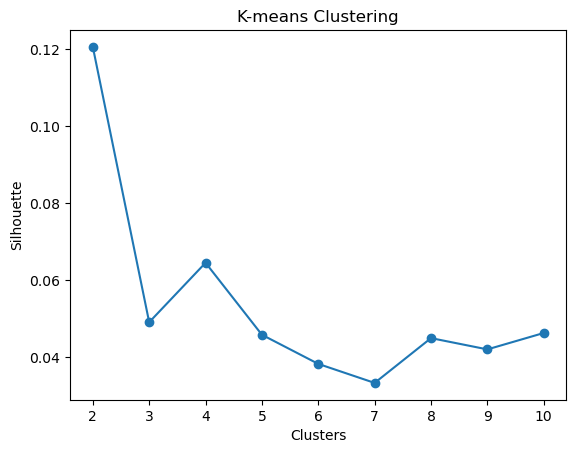

In [17]:
# 04.02.03-03
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
# dt01_clnm_col_rel_dt_sclr_dt_scr

plt.plot(clstr_num, silhouette_scores, marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Silhouette')
plt.title('K-means Clustering')
plt.show()

In [18]:
# 04.02.04-01
# Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.
# I chose two clusters as it is the optimal number in the plot in part three.
# dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs

dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs = 2

In [19]:
# 04.02.05-01
# Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
# assign variables
# dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs

kmns_02 = KMeans(n_clusters = dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs, random_state = 36)

In [20]:
# 04.02.05-02
# Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
# assign variables
# dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs

lbls_02 = kmns_02.fit_predict(dt01_clnm_col_rel_dt_sclr_dt)

In [21]:
# 04.02.06-01
# two features to the scaled data
# assign variables
# dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca

dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca = PCA(n_components = 2)

In [22]:
# 04.02.06-02
# Fit a PCA transformation with two features to the scaled data.
# assign variables
# dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf

dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf = dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca.fit_transform(dt01_clnm_col_rel_dt_sclr_dt)

In [23]:
# 04.02.07-01
# Create DataFrame for plotting
# dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf_pca_df

dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf_pca_df = pd.DataFrame(
    {'pca_x': dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf[:, 0], 
     'pca_y': dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf[:, 1], 
     'Cluster': lbls_02}
)

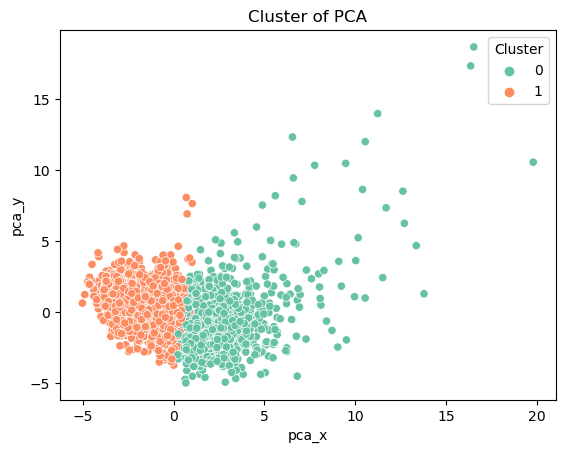

In [24]:
# 04.02.07-02
# Make a scatterplot of the PCA transformed data coloring each point by its cluster value.
# dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf_pca_df

sns.scatterplot(data = dt01_clnm_col_rel_dt_sclr_dt_scr_num_clstrs_pca_tsf_pca_df, x = 'pca_x', y = 'pca_y', palette = 'Set2', hue = 'Cluster')
plt.title('Cluster of PCA')
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.show()

In [25]:
# 04.02.08-01
# Summarize your results and make a conclusion

## Wasn't entirely sure which columns were irrelevant,
## so I removed max and min for each category as they likely have high correlation with the median.
## And I also removed the two id columns as per instructor's hint.
## Plotted number of cluster and silhouette score.
## The highest silhouette score is two, so I used two for the K-mean model.
## Used PCA to reduce dimensions to two.
## Used scatterplot for PCA results which shows separation of different categories.
## Visualizations help to show separation among groups.
## The colors assigned to each cluster in the scatterplot aid in distinguishing between different clusters.
## The visualization helps identify any patterns, overlaps, or separations between the clusters.
## This research helps to provide further insights into ALS.